<h1 style="text-align: center; font-weight: bold;">TECH2  Term Paper</h1>


<h1 style="text-align: center; font-weight: bold;">Fall 2024</h1>

<div style="text-align: center;">
    <h1>Candidate Numbers 8, 27 and 58 </h1>





<h3 style="font-weight: bold; font-size: 18px;">TASK 1: Electricity Price Development in NO2 and Germany</h3>

Importing the data: Looping Through each file and storing it in a DataFrame

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob

DATA_PATH = './data/DayAheadPrices_12.1.D' # set up a variable named DATA_PATH with the path to a directory as a string

pattern = f'{DATA_PATH}/*_DayAheadPrices_12.1.D.csv' # create a file path pattern to match specific files in the directory

data = [] # initialize an empty list 

for file in glob.glob(pattern):
    df = pd.read_csv(file, sep = '\t', parse_dates= ['DateTime']) # 
    data.append(df)

df= pd.concat(data, axis = 0) # combine all DataFrames in data into one df

Filter out unnecessary data: Filter data to keep only hourly (PT60M) records for Southern Norway (NO2) and Germany (DE_LU) 

In [2]:
df_filtered = df.query("MapCode in ['NO2', 'DE_LU'] and ResolutionCode == 'PT60M'") # include only rows where MapCode is "NO2" or "DE_LU" and ResolutionCode is "PT60M"

# Reshape data to create separate columns for each price zone and rename columns for clarity
df_reshaped = df_filtered.pivot(index='DateTime', columns='MapCode', values='Price')  
df_reshaped.columns = ['NO2 Price' if col == 'NO2' else 'Germany Price' for col in df_reshaped.columns]

df_filtered = df[(df['MapCode'].isin(['NO2', 'DE_LU'])) & (df['ResolutionCode'] == 'PT60M')]

# Reshape the data
df_pivot = df_filtered.pivot(index='DateTime', columns='MapCode', values='Price')                   
df_pivot.columns = ['NO2 Price' if col == 'NO2' else 'Germany Price' for col in df_pivot.columns]

nordlink_opening_date = pd.to_datetime('2020-12-09') # Define Nordlink Opening time

Plotting the information into a graph

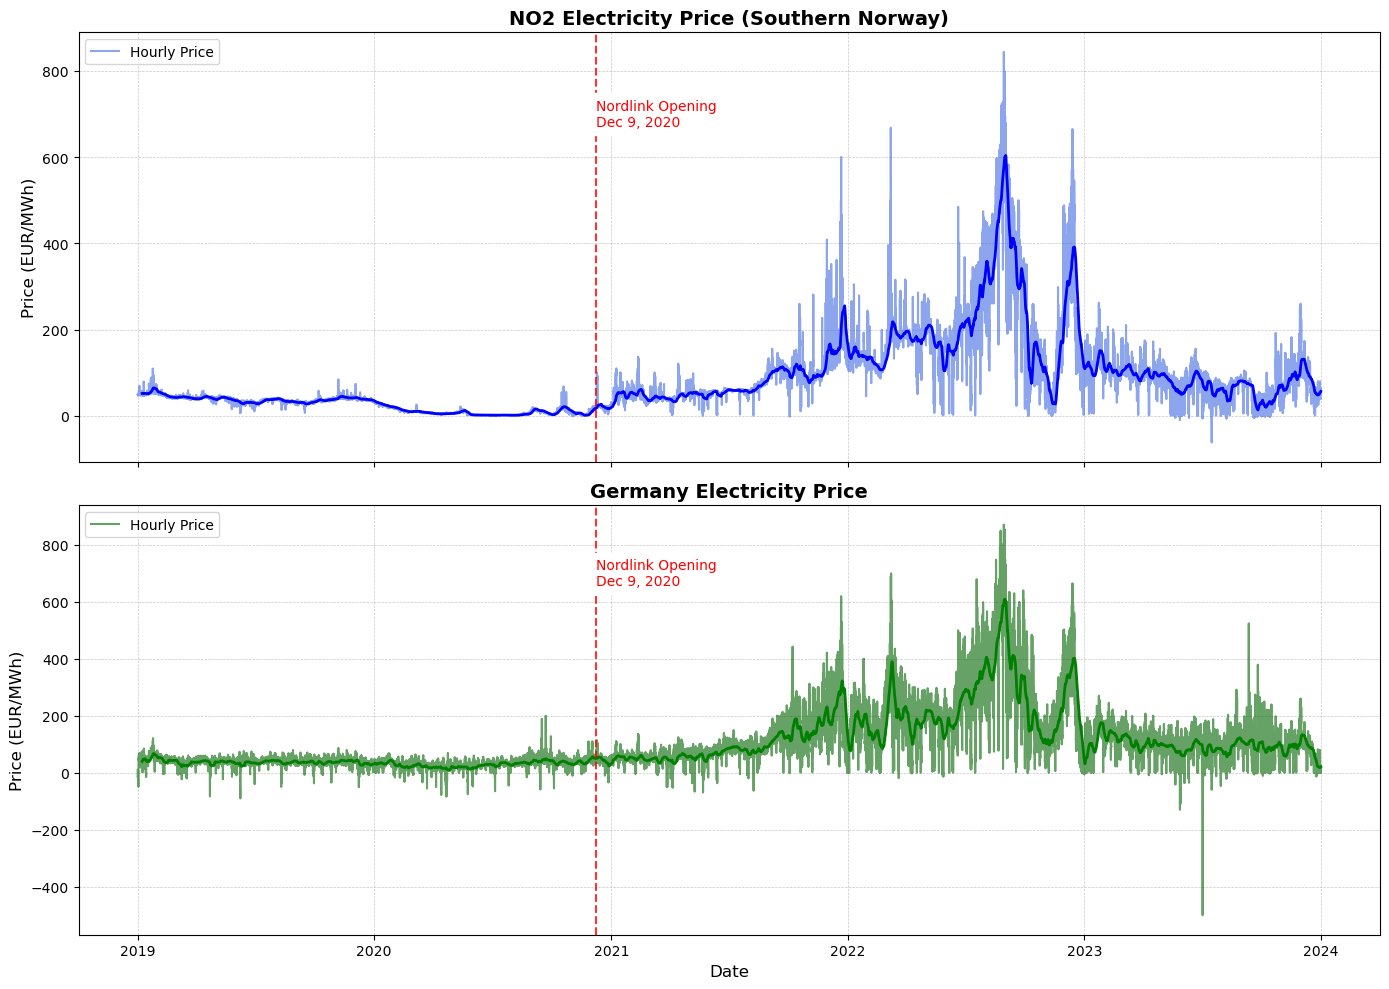

In [3]:
# Define Nordlink opening date
nordlink_opening_date = pd.to_datetime("2020-12-09")

# Create the main figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# NO2 Price Plot
ax1.plot(df_pivot.index, df_pivot['NO2 Price'], label='Hourly Price', color='royalblue', alpha=0.6)
ax1.plot(df_pivot.index, df_pivot['NO2 Price'].rolling(168).mean(), color='blue', linewidth=2)
ax1.axvline(nordlink_opening_date, color='red', linestyle='--', linewidth=1.5, alpha=0.8)
ax1.text(nordlink_opening_date, 700, 'Nordlink Opening\nDec 9, 2020', color='red', ha='left', va='center', fontsize=10, backgroundcolor='white')
ax1.set_title("NO2 Electricity Price (Southern Norway)", fontsize=14, fontweight='bold')
ax1.set_ylabel("Price (EUR/MWh)", fontsize=12)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Germany Price Plot
ax2.plot(df_pivot.index, df_pivot['Germany Price'], label='Hourly Price', color='darkgreen', alpha=0.6)
ax2.plot(df_pivot.index, df_pivot['Germany Price'].rolling(168).mean(), color='green', linewidth=2)
ax2.axvline(nordlink_opening_date, color='red', linestyle='--', linewidth=1.5, alpha=0.8)
ax2.text(nordlink_opening_date, 700, 'Nordlink Opening\nDec 9, 2020', color='red', ha='left', va='center', fontsize=10, backgroundcolor='white')
ax2.set_title("Germany Electricity Price", fontsize=14, fontweight='bold')
ax2.set_ylabel("Price (EUR/MWh)", fontsize=12)
ax2.set_xlabel("Date", fontsize=12)
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()


<h3 style="font-weight: bold; font-size: 18px;">Conclusion</h3>


Before Nordlink’s opening on December 9, 2020, electricity prices in Southern Norway (NO2) and Germany (DE_LU) were stable and low. Afterward, prices became more volatile, with an upward trend due to increased market integration. The NO2 and DE_LU interconnection now links price dynamics between regions, where supply and demand shifts in one affect the other. The 2022 European energy crisis also contributed to heightened volatility. Germany's negative prices occur when renewable output exceeds demand, typically during low-demand periods. Without sufficient storage or flexible demand, surplus generation drives negative prices to encourage consumption. 

<h3 style="font-weight: bold; font-size: 18px;">Task 2: Analysis of Yearly Summary Statistics for Electricity Prices in NO2 and Germany (2019-2023)</h3>

Import the data and store it in a DataFrame

In [4]:
# Import libraries
import pandas as pd
import glob
import matplotlib.pyplot as plt

DATA_PATH = './data/DayAheadPrices_12.1.D'
pattern = f'{DATA_PATH}/*_DayAheadPrices_12.1.D.csv'

data = []

# Read and concatenate all CSV files matching the pattern
for file in glob.glob(pattern):
    df = pd.read_csv(file, sep='\t', parse_dates=['DateTime'])
    data.append(df)

df = pd.concat(data, axis=0)

Filter out the information needed

In [5]:
# Keep only the required columns
df = df[['DateTime', 'ResolutionCode', 'MapCode', 'Price']]

# Filter for NO2 and DE MapCodes and hourly data
df_filtered = df.query("MapCode in ['NO2', 'DE_LU'] and ResolutionCode == 'PT60M'").copy()

# Extract the year from DateTime
df_filtered.loc[:, 'Year'] = df_filtered['DateTime'].dt.year  # Using .loc to avoid SettingWithCopyWarning
df = df_filtered


Create the excel label

In [6]:
# Group by Year and MapCode (NO2, DE), and calculate statistics
stats = df.groupby(['Year', 'MapCode']).agg(
    Mean=('Price', 'mean'),
    Median=('Price', 'median'),
    StdDev=('Price', 'std'),
    Min=('Price', 'min'),
    Max=('Price', 'max')
).reset_index()

# Round the results to two decimal places
stats = stats.round(2)

# Export the file as an excel table
# stats.to_excel('table_task2.xlsx', index=False, header=True) / adding # to not print it every time the code is run

<h3 style="font-weight: bold; font-size: 18px;">Conclusion</h3>

The table shows that day-ahead electricity prices rose in Norway (NO2) and Germany (DE_LU) from 2019 to 2023. Germany's prices became notably volatile in 2021-2022, with sharp variations and a 2023 minimum of -500.00, likely due to occasional overproduction. In contrast, Norway’s market saw steadier price increases without extreme swings or negative prices, suggesting greater stability—possibly due to different market structures. Overall, these trends reflect Germany’s more volatile market, while Norway’s market remained more stable with a steady upward trajectory.

<h3 style="font-weight: bold; font-size: 18px;">Task 3: Analyzing Electricity Imports and Exports between NO2 and Germany</h3>

Import Libraries, Define File Paths and Load Data

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# Define the path to the data folder and pattern for CSV files
DATA_PATH = './data/PhysicalFlows_12.1.G'
pattern = f'{DATA_PATH}/*_PhysicalFlows_12.1.G.csv'

# Load all matching files and concatenate them into a single DataFrame
all_files = glob.glob(pattern)
dataframes = [pd.read_csv(file, delimiter='\t', parse_dates=['DateTime']) for file in all_files] # files are tab-separated, meaning each column is separated by a tab character
data = pd.concat(dataframes, ignore_index=True)

Data Processing



In [8]:
# Standardize column names, fill any missing values in `FlowValue` with zero, and add a `Year` column for easier grouping

# Standardize column names for consistency
data.columns = ['DateTime', 'InMapCode', 'OutMapCode', 'FlowValue']

# Fill any missing values in 'FlowValue' with zero
data['FlowValue'] = data['FlowValue'].fillna(0)

# Add a 'Year' column for annual grouping
data['Year'] = data['DateTime'].dt.year

Filter Relevant Data

In [9]:
# Filter data for electricity flows between NO2 and DE_LU for all years
filtered_data = data[
    ((data['InMapCode'] == 'NO2') & (data['OutMapCode'] == 'DE_LU')) |
    ((data['InMapCode'] == 'DE_LU') & (data['OutMapCode'] == 'NO2'))
].copy()

# Define the direction of electricity flow
filtered_data['FlowType'] = np.where(filtered_data['OutMapCode'] == 'DE_LU', 'Export', 'Import')


Calculate Annual Sums of Exports and Imports

In [10]:
# Calculate the annual sum of exports and imports
annual_flows = filtered_data.groupby(['Year', 'FlowType'])['FlowValue'].sum().unstack(fill_value=0)


Plotting the Data

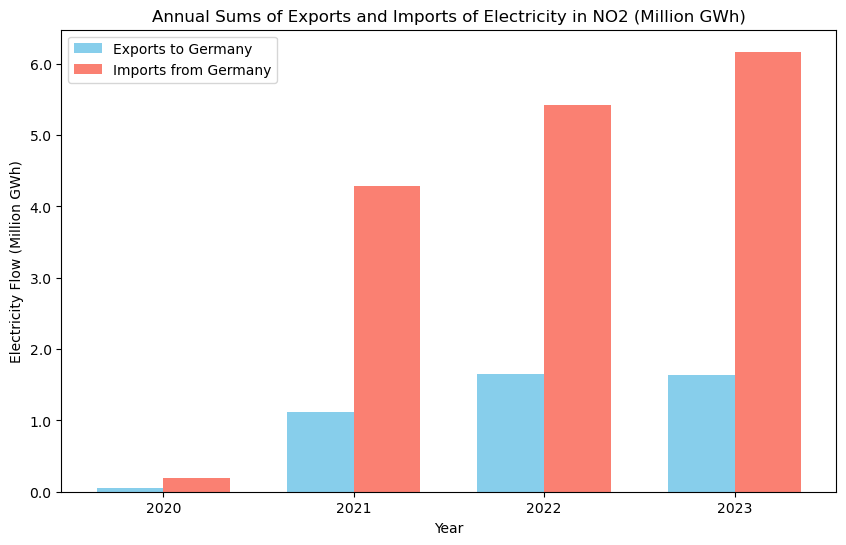

In [11]:
# Convert the data to millions of GWh for easier readability
annual_flows_million = annual_flows / 1_000_000

# Plotting the single bar plot for annual sums of exports and imports in million GWh
plt.figure(figsize=(10, 6))
bar_width = 0.35
years = annual_flows_million.index

# Create bars for exports and imports with distinct colors
plt.bar(years - bar_width/2, annual_flows_million['Export'], width=bar_width, label='Exports to Germany', color='skyblue')
plt.bar(years + bar_width/2, annual_flows_million['Import'], width=bar_width, label='Imports from Germany', color='salmon')

# Add labels, title, and legend
plt.title('Annual Sums of Exports and Imports of Electricity in NO2 (Million GWh)')
plt.xlabel('Year')
plt.ylabel('Electricity Flow (Million GWh)')
plt.legend()

# Format y-axis with commas for readability and adjust x-axis for integer year labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}'))  # Show one decimal place in millions
plt.xticks(years)  # Ensure clean integer year labels

# Display the plot
plt.show();


<h3 style="font-weight: bold; font-size: 18px;">Conclusion</h3>

The bar plot reveals that Norway (NO2) consistently imported more electricity from Germany than it exported from 2020 to 2023. Imports exceeded exports each year, highlighting a sustained reliance on electricity from Germany. Over time, this gap has widened significantly, reflecting growing import demand, particularly in Southern Norway (NO2).

<h3 style="font-weight: bold; font-size: 18px;">Task 4: Analysis of Weekly Net Electricity Transmission Flows from NO2 to Germany</h3>

Import Libraries, Define File Paths and Load Data

In [12]:
# Import Libraries

# Define file path for data
DATA_PATH = "./data/PhysicalFlows_12.1.G"
pattern_flow = f'{DATA_PATH}/*_PhysicalFlows_12.1.G.csv'

# Load and concatenate all files into a single DataFrame using a more efficient approach
data_flow = [pd.read_csv(file, sep='\t', parse_dates=["DateTime"]) for file in glob.glob(pattern_flow)]
df_flow = pd.concat(data_flow, axis=0)

Filter Relevant Data

In [13]:
# Filter for the required flows: Germany to Norway and Norway to Germany
df_flow_germany_to_norway = df_flow.query("InMapCode == 'DE_LU' and OutMapCode == 'NO2'")
df_flow_norway_to_germany = df_flow.query("InMapCode == 'NO2' and OutMapCode == 'DE_LU'")

Weekly Net Electricity Flow Calculation

In [14]:
# Set the DateTime index and ensure data is sorted for resampling
df_flow_germany_to_norway = df_flow_germany_to_norway.set_index('DateTime').sort_index()
df_flow_norway_to_germany = df_flow_norway_to_germany.set_index('DateTime').sort_index()

# Group by weekly periods and sum the 'FlowValue' column to get weekly net flows
weekly_germany_to_norway = df_flow_germany_to_norway['FlowValue'].resample('W').sum()
weekly_norway_to_germany = df_flow_norway_to_germany['FlowValue'].resample('W').sum()

# Calculate the weekly net flow: Germany to Norway minus Norway to Germany
df_net_flow_weekly = weekly_germany_to_norway - weekly_norway_to_germany

Plotting the Data

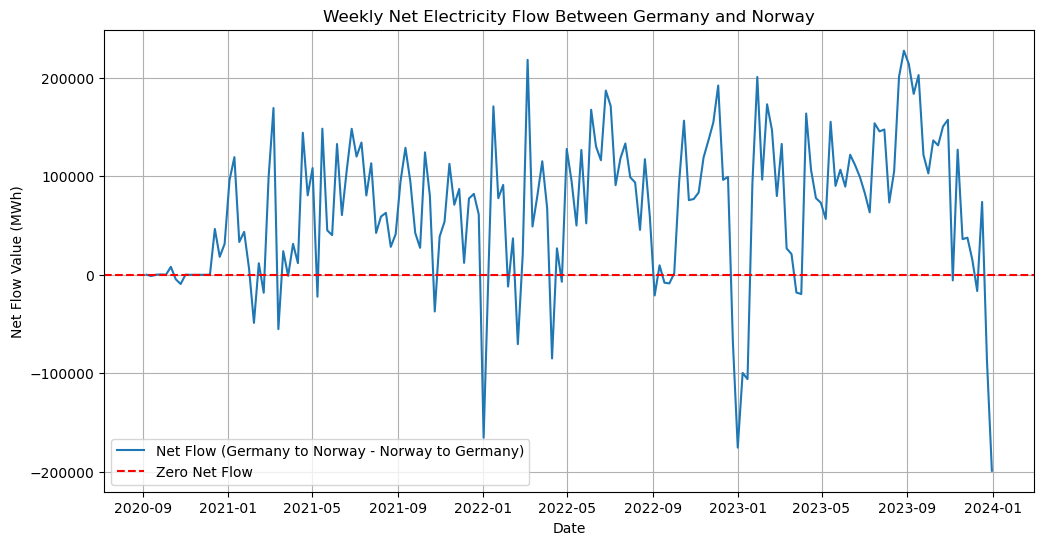

In [15]:
# Plotting the weekly net electricity flow
plt.figure(figsize=(12, 6))
plt.plot(df_net_flow_weekly.index, df_net_flow_weekly, label="Net Flow (Germany to Norway - Norway to Germany)")
plt.axhline(0, color='red', linestyle='--', label="Zero Net Flow")  # Zero line for reference
plt.title("Weekly Net Electricity Flow Between Germany and Norway")
plt.xlabel("Date")
plt.ylabel("Net Flow Value (MWh)")
plt.legend()
plt.grid(True)  

<h3 style="font-weight: bold; font-size: 18px;">Conclusion</h3>

The graph clearly shows that Norway (NO2) has generally been a net exporter of electricity to Germany throughout the observed period, as most of the net flow values are above zero. However, there are specific weeks where Norway becomes a net importer of electricity, indicated by negative net flow values. The seasonal trend reveals that during the winter months, Norway's electricity demand increases, likely due to the higher need for heating. As a result, Norway imports more electricity from Germany, reversing the typical net export pattern.

<h3 style="font-weight: bold; font-size: 18px;">Task 5</h3>

Import Libraries, Define File Paths and Load PhysicalFlows

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Load and concatenate all files into a single DataFrame
DATA_PATH = "./data/PhysicalFlows_12.1.G"
pattern_flow = f'{DATA_PATH}/*_PhysicalFlows_12.1.G.csv'
data_flow = [pd.read_csv(file, sep='\t', parse_dates=["DateTime"]) for file in glob.glob(pattern_flow)]
df_flow = pd.concat(data_flow, axis=0)

# Filter out unneccesary data
df_flow_germany = df_flow.query("InMapCode in ['DE_LU'] and OutMapCode in ['NO2']") # Filter for Germany data with specified MapCodes
df_flow_germany = df_flow_germany.sort_values('DateTime').set_index('DateTime') # Ensure the data is sorted by 'DateTime'
df_germany_weekly = df_flow_germany.resample('W').sum(numeric_only=True) # Group by weekly periods and sum the 'FlowValue' column
df_flow_norway = df_flow.query("InMapCode in ['NO2'] and OutMapCode in ['DE_LU']") # Filter for Norway data with specified MapCodes
df_flow_norway = df_flow_norway.sort_values('DateTime').set_index('DateTime') # Ensure the data is sorted by 'DateTime'

# Group by weekly periods and sum the 'FlowValue' column
df_norway_weekly = df_flow_norway.resample('W').sum(numeric_only=True)

# Calculate the net flow: Germany to Norway minus Norway to Germany
df_net_flow_weekly = df_germany_weekly['FlowValue'] - df_norway_weekly['FlowValue']

Load DayAheadPrices

In [17]:
DATA_PATH = './data/DayAheadPrices_12.1.D'
pattern = f'{DATA_PATH}/*_DayAheadPrices_12.1.D.csv'
data = []

for file in glob.glob(pattern):
    df = pd.read_csv(file, sep = '\t', parse_dates= ['DateTime'])
    data.append(df)
df= pd.concat(data, axis = 0)

# Filter data to keep hourly records for NO2 and DE_LU, reshaping and renaming columns 

df_filtered = df.query("MapCode in ['NO2', 'DE_LU'] and ResolutionCode == 'PT60M'") # Filter data 
df_reshaped = df_filtered.pivot(index='DateTime', columns='MapCode', values='Price') # Reshape columns
df_reshaped.columns = ['NO2 Price' if col == 'NO2' else 'Germany Price' for col in df_reshaped.columns]

df_filtered = df[(df['MapCode'].isin(['NO2', 'DE_LU'])) & (df['ResolutionCode'] == 'PT60M')]
df_pivot = df_filtered.pivot(index='DateTime', columns='MapCode', values='Price')
df_pivot.columns = ['NO2 Price' if col == 'NO2' else 'Germany Price' for col in df_pivot.columns]

nordlink_opening_date = pd.to_datetime('2020-12-09')

Defining the DataFrames


In [18]:
# Change the time to weekly
df_price_germany = df_filtered.query("MapCode == 'DE_LU'")
df_price_norway = df_filtered.query("MapCode == 'NO2'")

df_price_germany = df_price_germany.set_index('DateTime').resample('W').mean(numeric_only=True)
df_price_norway = df_price_norway.set_index('DateTime').resample('W').mean(numeric_only=True)

# Calculate the time difference
df_price_diff_weekly = df_price_germany['Price'] - df_price_norway['Price']

# Combine the DataFrames
df_weekly_data = pd.DataFrame({
    'Net Flow': df_net_flow_weekly,
    'Price Difference': df_price_diff_weekly
}).dropna()  # Avoids rows with missing data

correlation_coefficient = df_weekly_data['Net Flow'].corr(df_weekly_data['Price Difference'])

Create the Scatter Plot

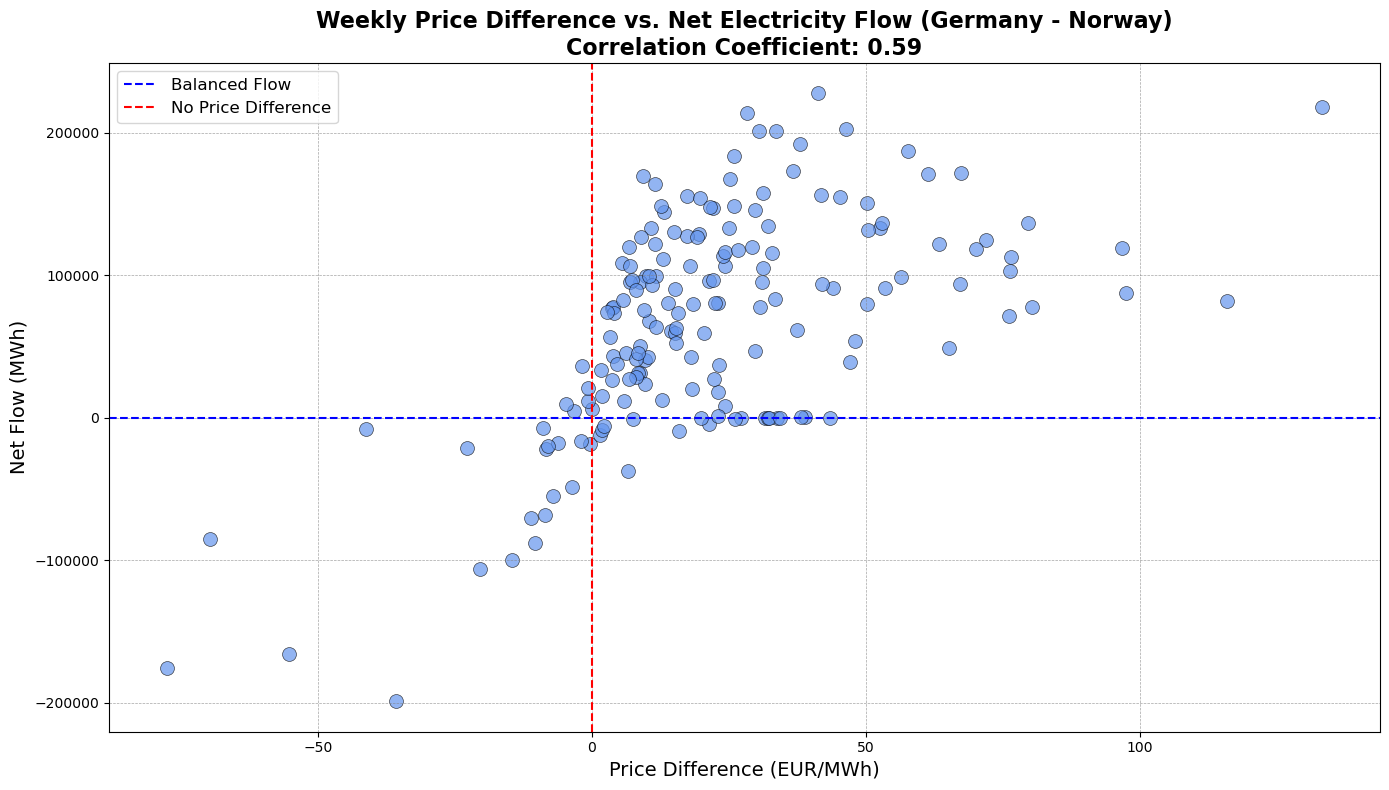

In [19]:
# Create a new figure
plt.figure(figsize=(14, 8))

# Scatter plot with larger markers and transparency 
plt.scatter(df_weekly_data['Price Difference'], df_weekly_data['Net Flow'], 
            alpha=0.7, s=100, c='cornflowerblue', edgecolor='black', linewidth=0.5)

# Adding title and axis labels 
plt.title(f"Weekly Price Difference vs. Net Electricity Flow (Germany - Norway)\n"
           f"Correlation Coefficient: {correlation_coefficient:.2f}", fontsize=16, fontweight='bold')
plt.xlabel("Price Difference (EUR/MWh)", fontsize=14)
plt.ylabel("Net Flow (MWh)", fontsize=14)

# Adding horizontal and vertical lines 
plt.axhline(0, color='blue', linestyle='--', label="Balanced Flow")
plt.axvline(0, color='red', linestyle='--', label="No Price Difference")

# Adding gridlines 
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Setting the font size to 12 and positions it in the plot's upper left corner
plt.legend(fontsize=12, loc='upper left')

# Adjust layout 
plt.tight_layout()

# Show the plot
plt.show()

<h3 style="font-weight: bold; font-size: 18px;">Conclusion</h3>

From the scatter plot, we observe that the data clusters around a low price difference, where the net flow of electricity between Norway and Germany is close to zero. This suggests that balanced electricity flows are associated with minimal price differences between the two countries. As the price difference increases, the data points spread further away from zero on the net flow axis, indicating that larger imports or exports are linked to bigger price differences. This suggests that the market adjusts prices in response to large electricity flows, with supply and demand affecting prices when big amounts of electricity are either exported or imported.

<h3 style="font-weight: bold; font-size: 18px;">Task 6: Documentation of Online Sources and Assistance Used in the Assignment</h3>

To complete this project, our group relied on our knowledge of Python, complemented by a range of online tools and resources. These online sources were primarily used to optimize and refine our code.
Among the online resources, Stack Overflow was the most frequently consulted. We used it to better understand best practices in Python programming, such as standard methods for generating graphs in academic papers. Additionally, it helped us solve the challenge of saving data to a .xml file properly.
In addition to Stack Overflow, we made extensive use of AI tools, particularly ChatGPT from OpenAI. ChatGPT played a key role in optimizing our code and offering guidance on best practices. For example, in Task 4, we sought an alternative to the “lambda” function for converting hourly data into a weekly time frame. ChatGPT suggested using the resample ()function with a "W" frequency setting, which resulted in more efficient, streamlined code that was also significantly shorter.
ChatGPT was also crucial in enhancing the performance of our code in Task 1. The original data import process was slow, but after consulting ChatGPT, we rewrote the code to improve both its efficiency and organization—key factors when working with large datasets containing hundreds of thousands of values. Additionally, ChatGPT helped us present the results more effectively by suggesting advanced techniques for tweaking the graph, resulting in a more informative and visually compelling display of the data. We were suggested a bigger range of colours, for instance cornflowerblue. Instead of using similar shades of a color, this helped us learn what python is capable of, learing the language code at the same time.
In conclusion, while online resources were crucial during the optimization phase of the project, they were not the foundation for executing the tasks. Rather, these tools served as valuable aids in refining and enhancing the quality and efficiency of our work.